In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv('data1972-2023.csv')
df.describe()

,DIRECTION_MAX_GUST1,SPEED_MAX_GUST1,SNOW_ON_GROUND1,TOTAL_PRECIPITATION1,HEATING_DEGREE_DAYS1,COOLING_DEGREE_DAYS1,MIN_REL_HUMIDITY1,MAX_REL_HUMIDITY1,MAX_TEMPERATURE1,MEAN_TEMPERATURE1,...,TOTAL_RAIN3,TOTAL_SNOW3,SNOW_ON_GROUND3,MAX_TEMPERATURE3,MEAN_TEMPERATURE3,MIN_TEMPERATURE3,Value,Year,Month,Day
count,2250.000000,2250.000000,5626.000000,10877.000000,10877.000000,10877.000000,4283.000000,4287.000000,10877.000000,10877.000000,...,8457.000000,8452.000000,10047.000000,18766.000000,18731.000000,18788.000000,19320.000000,19320.000000,19320.000000,19320.000000
mean,23.857333,37.783556,9.873445,1.003563,14.640144,0.059148,41.628998,90.873571,10.405236,3.419003,...,0.977214,0.892097,26.880760,8.296067,2.899648,-2.510704,807.750342,1997.050466,6.533489,15.733282
std,9.193373,5.999614,11.855949,2.954058,10.126739,0.385451,18.499451,8.163853,11.470436,10.219083,...,2.926498,2.669852,34.331648,11.887143,10.753810,10.217679,745.405423,15.268730,3.443978,8.798686
min,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,6.000000,39.000000,-28.500000,-36.600000,...,0.000000,0.000000,0.000000,-34.400000,-39.000000,-45.100000,75.000000,1971.000000,1.000000,1.000000
25%,18.000000,33.000000,0.000000,0.000000,6.400000,0.000000,27.000000,87.000000,2.700000,-2.800000,...,0.000000,0.000000,0.000000,0.400000,-3.500000,-7.700000,224.000000,1984.000000,4.000000,8.000000
50%,23.000000,36.000000,4.000000,0.000000,13.800000,0.000000,38.000000,93.000000,10.500000,4.200000,...,0.000000,0.000000,5.000000,8.600000,3.700000,-1.000000,542.000000,1997.000000,7.000000,16.000000
75%,33.000000,41.000000,17.000000,0.700000,20.800000,0.000000,54.000000,97.000000,19.200000,11.600000,...,0.200000,0.000000,52.000000,17.800000,11.700000,5.200000,1150.000000,2010.000000,10.000000,23.000000
max,36.000000,77.000000,80.000000,89.000000,54.600000,7.800000,97.000000,100.000000,41.200000,25.800000,...,39.000000,33.600000,165.000000,38.700000,27.500000,19.000000,4980.000000,2023.000000,12.000000,31.000000


In [3]:
# Drop any non-numeric columns that aren't needed for training
df.drop(['LOCAL_DATE', 'SYM'], axis=1, inplace=True)

# Impute missing values
imputer = SimpleImputer(strategy='constant', fill_value=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Define X and Y
Y = df_imputed['Value']  # Target variable
X = df_imputed.drop('Value', axis=1)  # Features

In [4]:
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y.values.reshape(-1, 1)).flatten()

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)


In [5]:

# # Train the SVR model
# svm_model = SVR(kernel='rbf', C=10)
# svm_model.fit(X_train, Y_train)

# # Make predictions
# Y_pred_scaled = svm_model.predict(X_test)
# Y_pred = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 1)).flatten()
# Y_pred = np.maximum(Y_pred, 0)

# Y_test = scaler_Y.inverse_transform(Y_test.reshape(-1, 1)).flatten()

In [6]:

# # Split the dataset into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)


In [7]:

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Train the model
# svm_regressor = SVR(kernel='rbf', C=1)  # 'rbf' is the default kernel; you can try others like 'linear', 'poly', etc.
# svm_regressor.fit(X_train_scaled, Y_train)

# Y_pred = svm_regressor.predict(X_test_scaled)
# Y_pred = np.maximum(Y_pred, 0)  # Ensures that all predictions are non-negative

In [8]:

# # Define the parameter grid
# param_grid = {
#     'kernel': ['rbf', 'poly'],
#     'C': [1, 10, 100, 1000],
#     'gamma': [0.001, 0.01, 0.1, 1],
#     'epsilon': [0.01, 0.1, 1],
#     'degree': [2, 3, 4]  # Only for polynomial kernel
# }

# # Perform grid search
# grid_search = GridSearchCV(SVR(), param_grid, refit=True, verbose=3, cv=3)
# grid_search.fit(X_train, Y_train)

# # Make predictions
# Y_pred_scaled = grid_search.predict(X_test)
# Y_pred = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 1)).flatten()
# Y_pred = np.maximum(Y_pred, 0)

# Y_test = scaler_Y.inverse_transform(Y_test.reshape(-1, 1)).flatten()

# # Best parameters and score
# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best score: {grid_search.best_score_}")

# # Predict with best estimator
# best_svr = grid_search.best_estimator_
# Y_pred = best_svr.predict(X_test)


In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define the parameter grid
param_distributions = {
    'model__C': np.logspace(-3, 3, 10),          # C: 10^-3 to 10^3
    'model__gamma': np.logspace(-4, 0, 10),      # gamma: 10^-4 to 1
    'model__epsilon': np.linspace(0.01, 1, 10),  # epsilon: 0.01 to 1
    'model__kernel': ['rbf', 'poly', 'linear', 'sigmoid'],  # kernel types
}

# Create a pipeline that scales the data and then applies SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', SVR())               # SVR model
])

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=50,                    # Number of random combinations to try
    cv=3,                         # 5-fold cross-validation
    random_state=2,              # Reproducibility
    verbose=3     # Use all available cores
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, Y_train)

# Output the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Make predictions using the best model
best_svr = random_search.best_estimator_
Y_pred_scaled = best_svr.predict(X_test)

# Inverse transform to get the original scale of Y
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 1)).flatten()

# Evaluate the performance on test data
r_squared = r2_score(Y_test, Y_pred)
print(f"R-squared: {r_squared}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r_squared = r2_score(Y_test, Y_pred)
print(f"R-squared: {r_squared}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 157863.24393517166
R-squared: 0.7125137588617882
Root Mean Squared Error: 397.32007743779025


In [ ]:
# # Assuming grid_search is the result from GridSearchCV or RandomizedSearchCV
# results = pd.DataFrame(grid_search.cv_results_)

# # Check for duplicates
# duplicate_check = results.duplicated(subset=['param_C', 'param_gamma'], keep=False)
# print(results[duplicate_check])

# # Aggregate duplicates
# results_aggregated = results.groupby(['param_C', 'param_gamma']).agg({'mean_test_score': 'mean'}).reset_index()

# # Pivot the table to get a matrix of mean test scores
# pivot_table = results_aggregated.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

# # Plot the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(pivot_table, annot=True, cmap='viridis')
# plt.title('Grid Search Hyperparameter Tuning')
# plt.xlabel('Gamma')
# plt.ylabel('C')
# plt.show()


In [ ]:
# Assuming grid_search is the result from GridSearchCV or RandomizedSearchCV
results = pd.DataFrame(random_search.cv_results_)

# Pivot the table to get a matrix of mean test scores
pivot_table = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Grid Search Hyperparameter Tuning')
plt.xlabel('Degree')
plt.ylabel('C')
plt.show()

In [ ]:
# sns.pairplot(results, hue='mean_test_score', vars=['param_C', 'param_gamma'], palette='viridis')
# plt.suptitle('Pair Plot of Hyperparameters', y=1.02)
# plt.show()

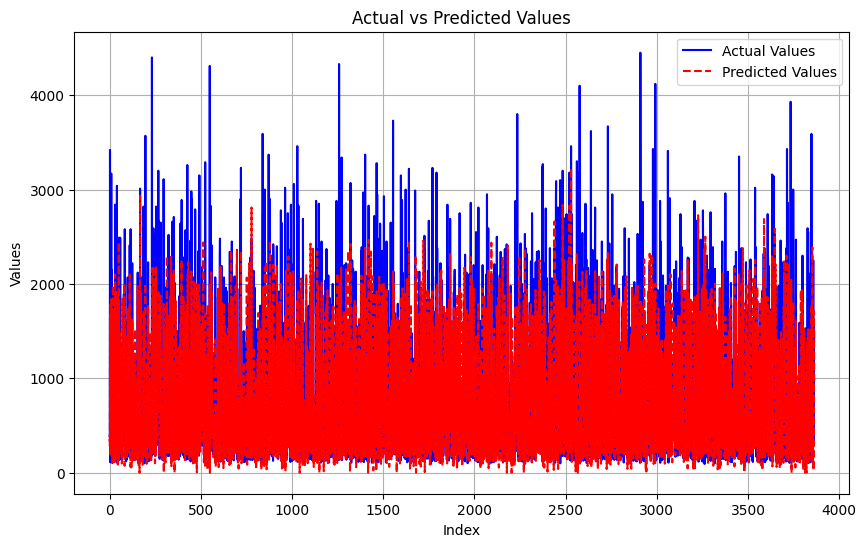

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, color='blue', label='Actual Values')
plt.plot(range(len(Y_pred)), Y_pred, color='red', linestyle='--', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

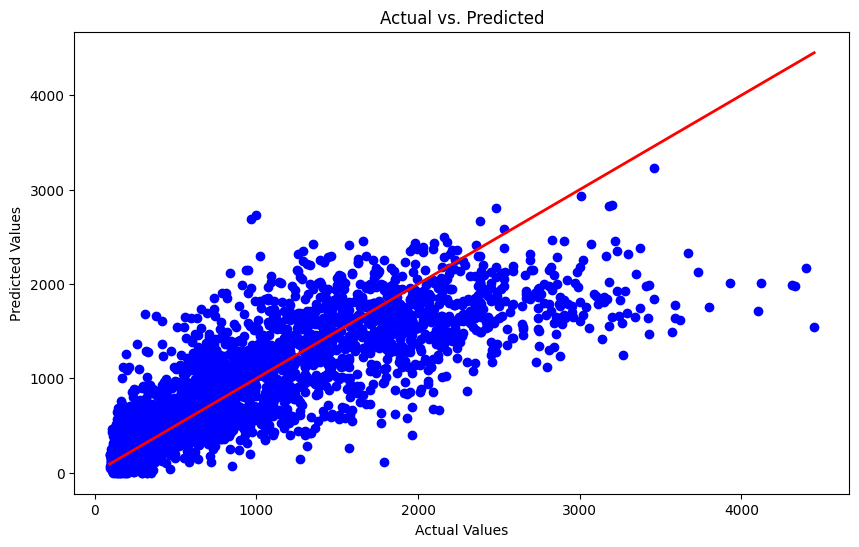

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()

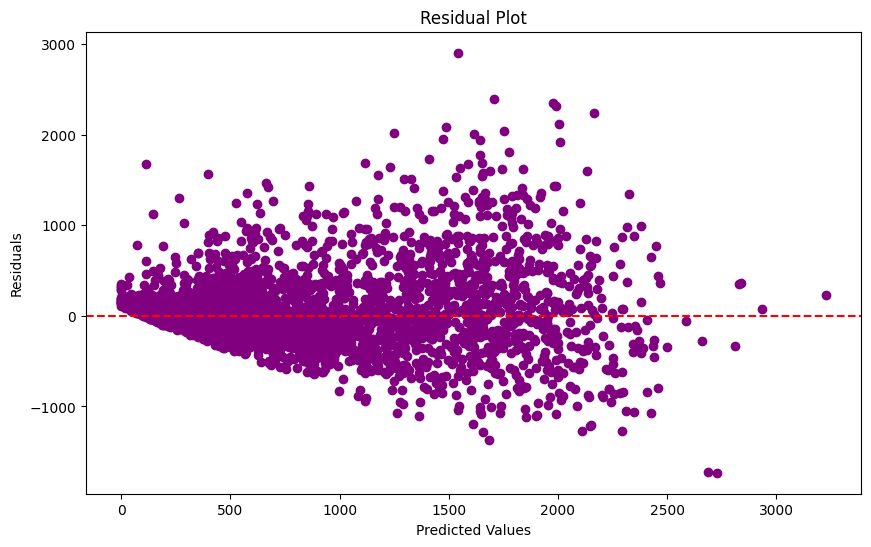

In [ ]:
residuals = Y_test - Y_pred

plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

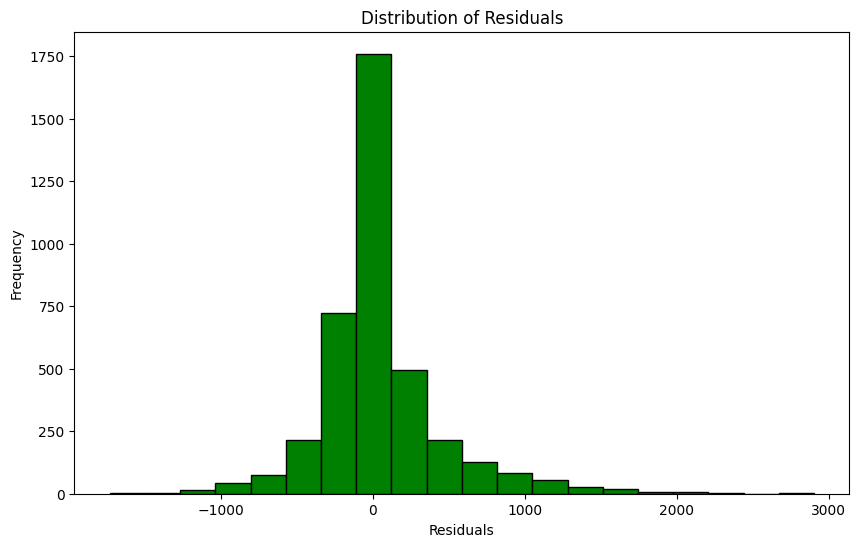

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='green', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

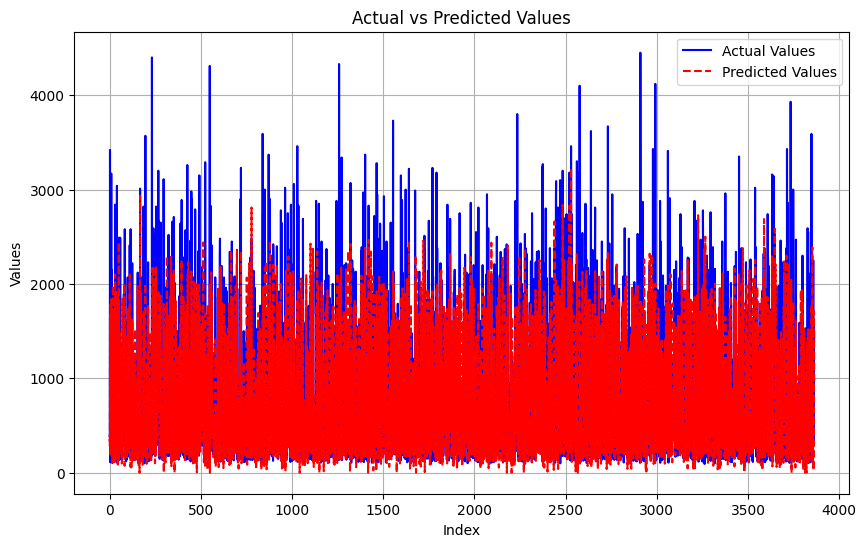

In [ ]:
# Line plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, color='blue', label='Actual Values')
plt.plot(range(len(Y_pred)), Y_pred, color='red', linestyle='--', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()